In [2]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
from io import BytesIO
import numpy as np
import os
import requests

In [3]:
model=ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 1s 0us/step


In [4]:
def prepare_image(image,target):
  image=image.resize(target)
  image=img_to_array(image)
  image=np.expand_dims(image,axis=0)
  image=imagenet_utils.preprocess_input(image)
  return image

In [67]:
image_url="https://i2.wp.com/arsizsanat.com/wp-content/uploads/2017/09/Resim-2-min.jpg?resize=810%2C547"

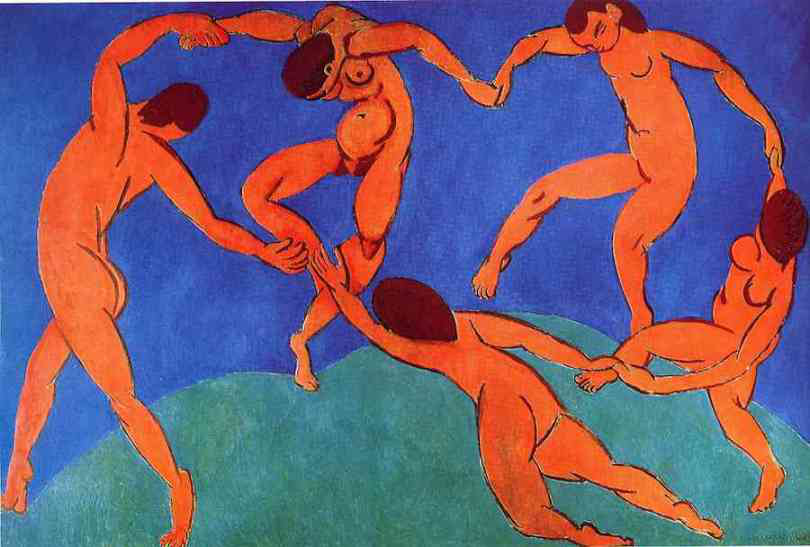

In [68]:
response=requests.get(image_url)
image=Image.open(BytesIO(response.content))
image

In [69]:
data={"success":False}
pre_image=prepare_image(image,target=(224,224))
preds=model.predict(pre_image)
result=imagenet_utils.decode_predictions(preds)
data["tahmin"]=[]

In [70]:
result


[[('n07248320', 'book_jacket', 0.77344376),
  ('n03485794', 'handkerchief', 0.067787),
  ('n06596364', 'comic_book', 0.055918813),
  ('n04476259', 'tray', 0.040195305),
  ('n03595614', 'jersey', 0.012254585)]]

In [71]:
for (id,baslik,tahmin) in result[0]:
  r={"tahmin":baslik,
     "olasılık":float(tahmin)}
  data["tahmin"].append(r)

In [72]:
data["success"]=True
print(data)

{'success': True, 'tahmin': [{'tahmin': 'book_jacket', 'olasılık': 0.7734437584877014}, {'tahmin': 'handkerchief', 'olasılık': 0.06778699904680252}, {'tahmin': 'comic_book', 'olasılık': 0.05591881275177002}, {'tahmin': 'tray', 'olasılık': 0.04019530490040779}, {'tahmin': 'jersey', 'olasılık': 0.012254584580659866}]}


In [73]:
print("tahmini en yüksek olan {0} oranıyla {1}'dir. ".format(data["tahmin"][0]["olasılık"],data["tahmin"][0]["tahmin"]))

tahmini en yüksek olan 0.7734437584877014 oranıyla book_jacket'dir. 
